In [190]:
import tensorflow
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Loading the dataset and performing data analysis:**

In [191]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (50000, 32, 32, 3)
X_test.shape: (10000, 32, 32, 3)
y_train.shape: (50000, 1)
y_test.shape: (10000, 1)


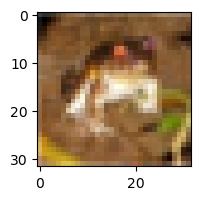

In [192]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])

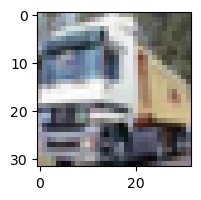

In [193]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1])

In [194]:
classes, counts = np.unique(y_train, return_counts=True)
classes, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**The CIFAR10 dataset has a total of 60,000 samples split across training and test sets. The training dataset has 50,000 images where each image is a 32x32 dimensional matrix with 3 colour channels (RGB). The testing dataset has 10,000 samples of images. The output classes range from 0-9. The dataset is balanced with equal number of samples (5000) for each of the classes.**

In [195]:
# Normalizing the dataset 
X_train = X_train / 255
X_test = X_test / 255
print("Normalized datasets: ", X_train, X_test)

Normalized datasets:  [[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.545098

In [196]:
# Randomly sampling 20% of this dataset for training purpose
from sklearn.model_selection import train_test_split
X_train_random, _ , y_train_random, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=1)
print(f"X_train_random.shape: {X_train_random.shape}, y_train_random.shape: {y_train_random.shape}")

X_train_random.shape: (10000, 32, 32, 3), y_train_random.shape: (10000, 1)


**Building the Multilayer Perceptron:**

In [197]:
mlp = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(512, activation='sigmoid'),
        layers.Dense(512, activation='sigmoid'),
        layers.Dense(10, activation='sigmoid')
    ])

mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mlp.fit(X_train_random, y_train_random, epochs=5)

Epoch 1/5
313/313 [==============================] - 2s 6ms/step - loss: 2.0623 - accuracy: 0.2359
Epoch 2/5
313/313 [==============================] - 2s 6ms/step - loss: 1.9091 - accuracy: 0.3085
Epoch 3/5
313/313 [==============================] - 2s 6ms/step - loss: 1.8401 - accuracy: 0.3301
Epoch 4/5
313/313 [==============================] - 2s 6ms/step - loss: 1.8071 - accuracy: 0.3427
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 1.7802 - accuracy: 0.3505


In [198]:
print("Accuracy of MLP:", mlp.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 1.7990 - accuracy: 0.3436
Accuracy of MLP: [1.7990206480026245, 0.34360000491142273]


In [199]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = mlp.predict(X_test)

y_pred_classes = []

for element in y_pred:
    y_pred_classes.append(np.argmax(element))
    
print("Accuracy score: ", accuracy_score(y_test, y_pred_classes))
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Accuracy score:  0.3436
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.42      0.43      1000
           1       0.37      0.56      0.45      1000
           2       0.43      0.01      0.02      1000
           3       0.20      0.71      0.31      1000
           4       0.33      0.37      0.35      1000
           5       0.64      0.01      0.01      1000
           6       0.47      0.24      0.32      1000
           7       0.52      0.29      0.37      1000
           8       0.47      0.44      0.45      1000
           9       0.47      0.39      0.43      1000

    accuracy                           0.34     10000
   macro avg       0.43      0.34      0.31     10000
weighted avg       0.43      0.34      0.31     10000



**Confusion Matrix for MLP:**

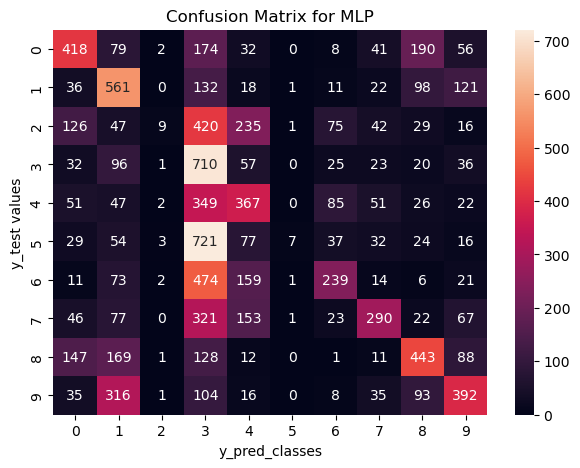

In [200]:
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for MLP')
plt.xlabel('y_pred_classes')
plt.ylabel('y_test values')
plt.show()

**Building the CNN1 network:**

In [201]:
cnn1 = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid')
])

cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn1.fit(X_train_random, y_train_random, batch_size=32, epochs=5)

Epoch 1/5
313/313 [==============================] - 35s 111ms/step - loss: 1.7779 - accuracy: 0.3458
Epoch 2/5
313/313 [==============================] - 35s 111ms/step - loss: 1.3645 - accuracy: 0.5016
Epoch 3/5
313/313 [==============================] - 34s 109ms/step - loss: 1.0740 - accuracy: 0.6110
Epoch 4/5
313/313 [==============================] - 35s 112ms/step - loss: 0.6925 - accuracy: 0.7637
Epoch 5/5
313/313 [==============================] - 35s 113ms/step - loss: 0.3274 - accuracy: 0.9008


In [202]:
print("Accuracy of CNN1:", cnn1.evaluate(X_test, y_test))

313/313 [==============================] - 5s 14ms/step - loss: 1.7177 - accuracy: 0.5171
Accuracy of CNN1: [1.7176969051361084, 0.5170999765396118]


In [203]:
y_pred_cnn1 = cnn1.predict(X_test)

# Determine the classes
y_pred_cnn1_classes = []

for element in y_pred_cnn1:
    y_pred_cnn1_classes.append(np.argmax(element))
    
print("Accuracy score of CNN1: ", accuracy_score(y_test, y_pred_cnn1_classes))
print("Classification Report of CNN1: \n", classification_report(y_test, y_pred_cnn1_classes))

313/313 [==============================] - 5s 15ms/step
Accuracy score of CNN1:  0.5171
Classification Report of CNN1: 
               precision    recall  f1-score   support

           0       0.72      0.38      0.50      1000
           1       0.73      0.56      0.63      1000
           2       0.40      0.43      0.42      1000
           3       0.35      0.36      0.36      1000
           4       0.43      0.42      0.43      1000
           5       0.47      0.40      0.43      1000
           6       0.57      0.60      0.58      1000
           7       0.59      0.58      0.58      1000
           8       0.60      0.71      0.65      1000
           9       0.47      0.73      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.51     10000
weighted avg       0.53      0.52      0.51     10000



**Confusion Matrix for CNN1:**

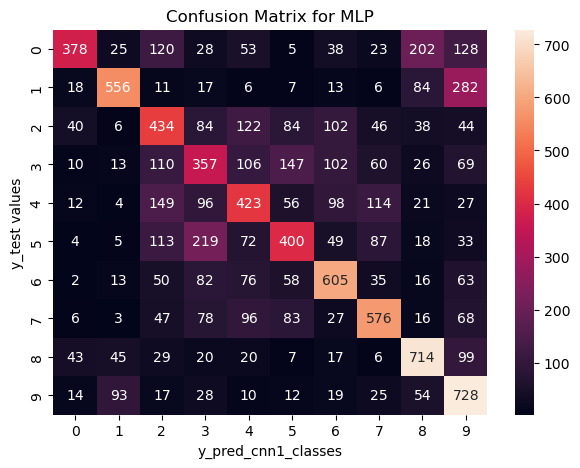

In [204]:
cm_cnn1 = confusion_matrix(y_test, y_pred_cnn1_classes)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_cnn1, annot=True, fmt='d')
plt.title('Confusion Matrix for MLP')
plt.xlabel('y_pred_cnn1_classes')
plt.ylabel('y_test values')
plt.show()

**Building the CNN-2 network:**

In [205]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn2.fit(X_train_random, y_train_random, batch_size=32, epochs=5)

Epoch 1/5
313/313 [==============================] - 6s 17ms/step - loss: 1.9462 - accuracy: 0.2685
Epoch 2/5
313/313 [==============================] - 5s 15ms/step - loss: 1.5714 - accuracy: 0.4194
Epoch 3/5
313/313 [==============================] - 5s 15ms/step - loss: 1.4053 - accuracy: 0.4870
Epoch 4/5
313/313 [==============================] - 5s 15ms/step - loss: 1.2921 - accuracy: 0.5325
Epoch 5/5
313/313 [==============================] - 5s 15ms/step - loss: 1.1650 - accuracy: 0.5804


In [206]:
print("Accuracy of CNN 2:", cnn2.evaluate(X_test, y_test))

313/313 [==============================] - 2s 4ms/step - loss: 1.1959 - accuracy: 0.5696
Accuracy of CNN 2: [1.1959307193756104, 0.569599986076355]


In [207]:
y_pred_cnn2 = cnn2.predict(X_test)

# Determine the classes
y_pred_cnn2_classes = []

for element in y_pred_cnn2:
    y_pred_cnn2_classes.append(np.argmax(element))
    
print("Accuracy score of CNN-2: ", accuracy_score(y_test, y_pred_cnn2_classes))
print("Classification Report of CNN-2: \n", classification_report(y_test, y_pred_cnn2_classes))

313/313 [==============================] - 1s 4ms/step
Accuracy score of CNN-2:  0.5696
Classification Report of CNN-2: 
               precision    recall  f1-score   support

           0       0.71      0.49      0.58      1000
           1       0.76      0.61      0.68      1000
           2       0.44      0.43      0.44      1000
           3       0.46      0.28      0.35      1000
           4       0.46      0.56      0.51      1000
           5       0.45      0.57      0.50      1000
           6       0.74      0.58      0.65      1000
           7       0.59      0.71      0.64      1000
           8       0.58      0.82      0.68      1000
           9       0.62      0.65      0.63      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000



**Confusion Matrix for CNN-2:**

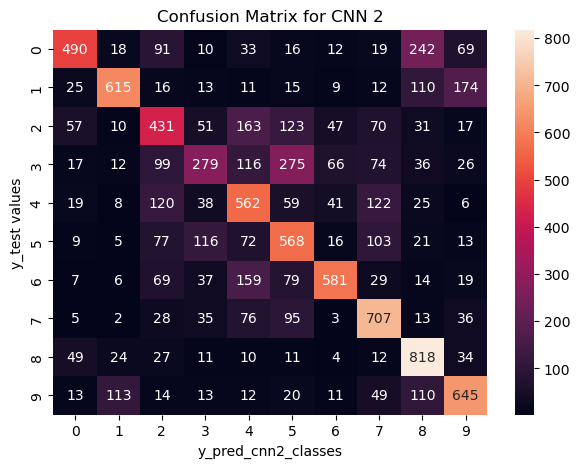

In [208]:
cm_cnn2 = confusion_matrix(y_test, y_pred_cnn2_classes)

# Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm_cnn2, annot=True, fmt='d')
plt.title('Confusion Matrix for CNN 2')
plt.xlabel('y_pred_cnn2_classes')
plt.ylabel('y_test values')
plt.show()